In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [12]:
data[data.isnull().values == True]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [13]:
import seaborn as sns
sns.set(color_codes=True)

# 年收入分布

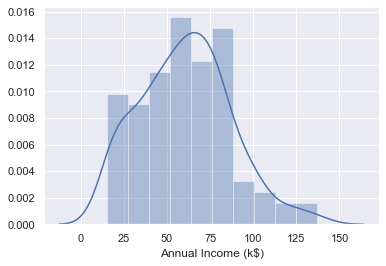

In [14]:
sns.distplot(data['Annual Income (k$)'], kde=True)

# 年龄分布

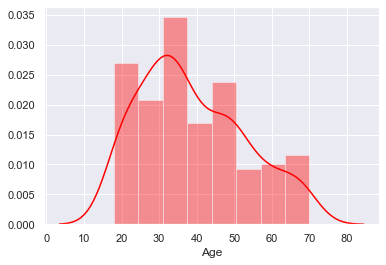

In [19]:
sns.distplot(data.Age, color='red', kde=True)

# 年收入

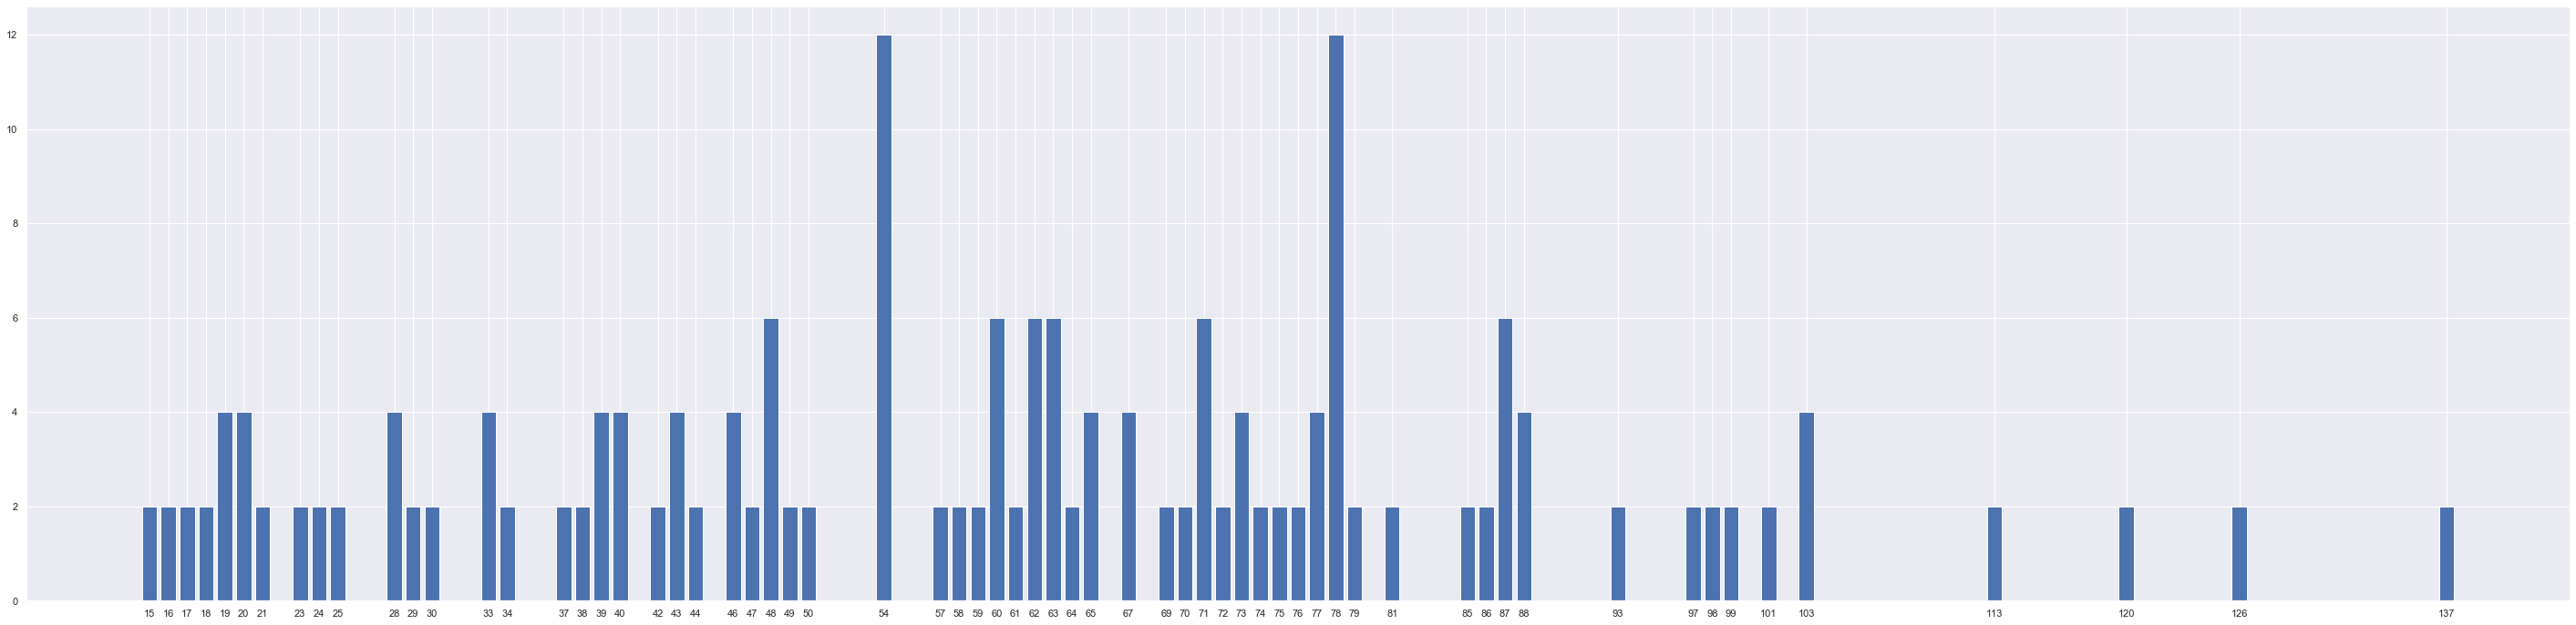

In [44]:
plt.figure(1, (50, 12))
d = data.groupby(by='Annual Income (k$)').size()
# d[d==0]
plt.bar(d.index, d.values)
plt.xticks(d.index, d.index)
plt.show()

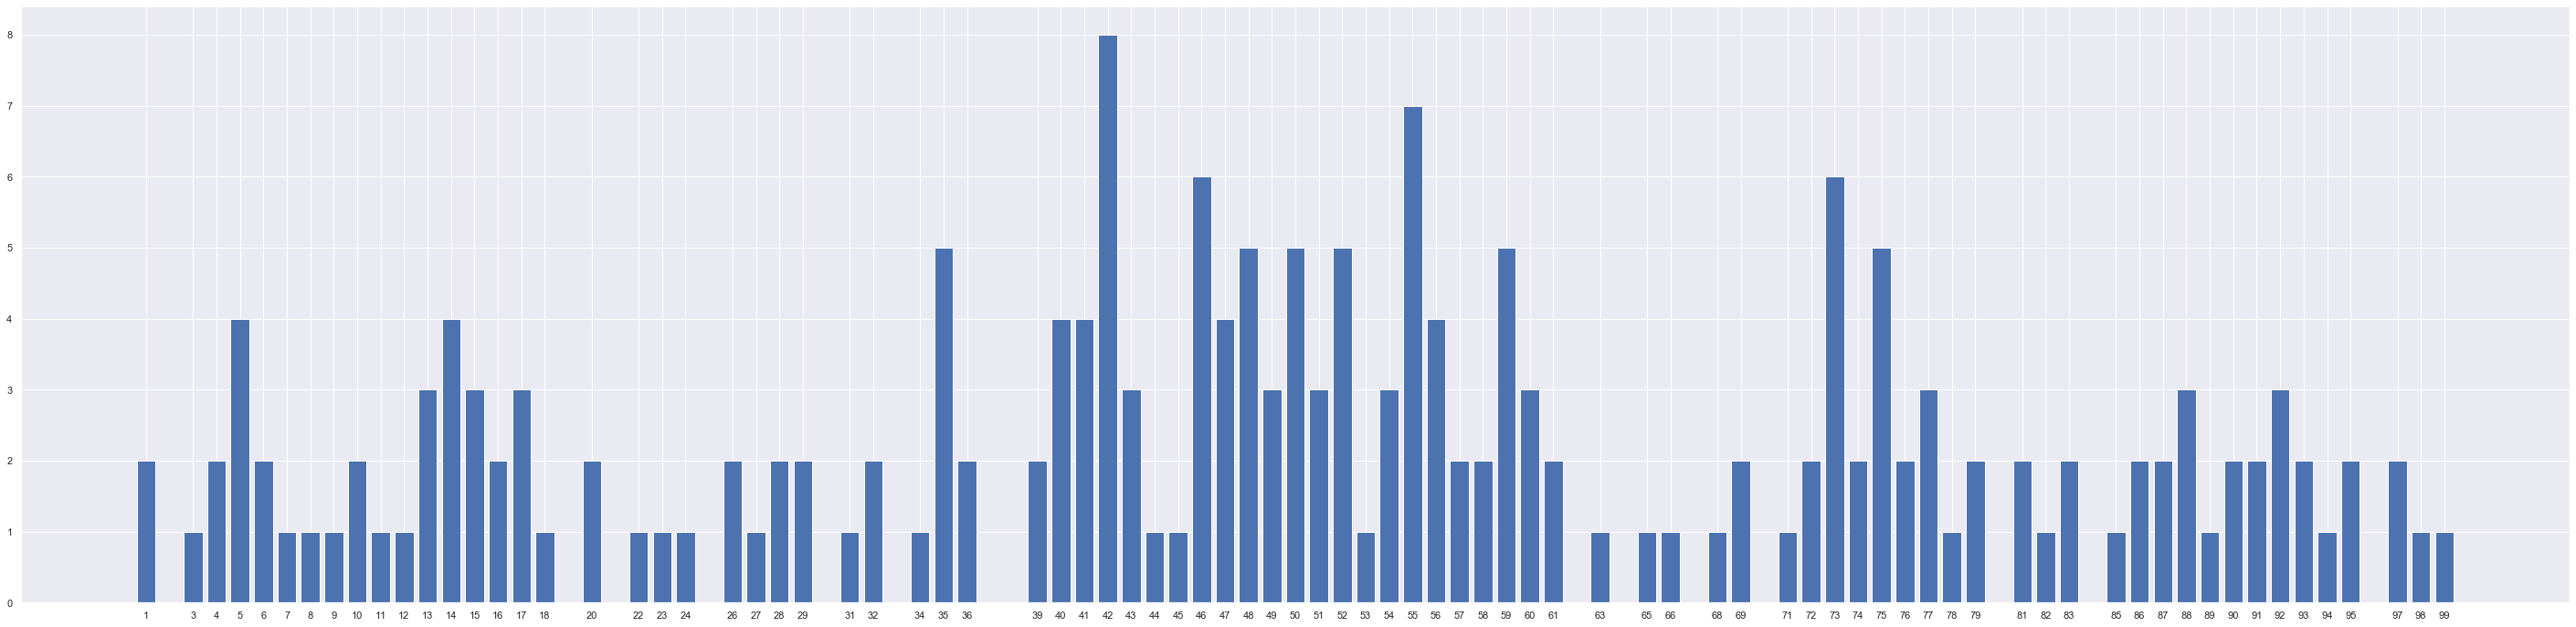

In [46]:
plt.figure(2, (50, 12))
d = data.groupby(by='Spending Score (1-100)').size()
# d[d==0]
plt.bar(d.index, d.values)
plt.xticks(d.index, d.index)
plt.show()

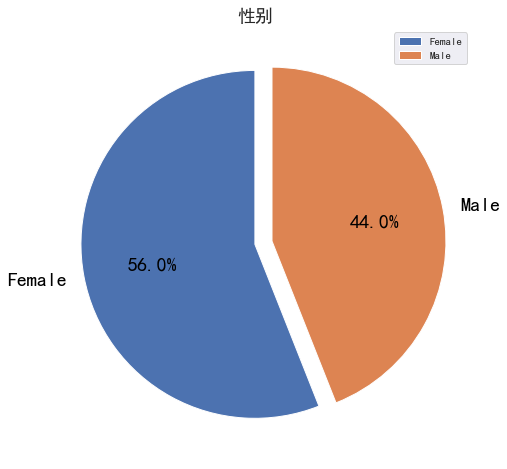

In [79]:
import warnings
warnings.filterwarnings('ignore')
# 设置字体显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置显示负号等字符
plt.rcParams['axes.unicode_minus'] = False
plt.figure(3, (12, 8))
d = data.groupby(by='Gender').size()
# d[d==0]
explode = (0,0.1)
plt.pie(d.values, labels=d.index, explode=explode, labeldistance=1.1, autopct='%1.1f%%', startangle=90, radius=1.0, textprops={'fontsize':20,'color':'black'})
plt.title('性别', fontsize=18)
plt.legend()
plt.show()

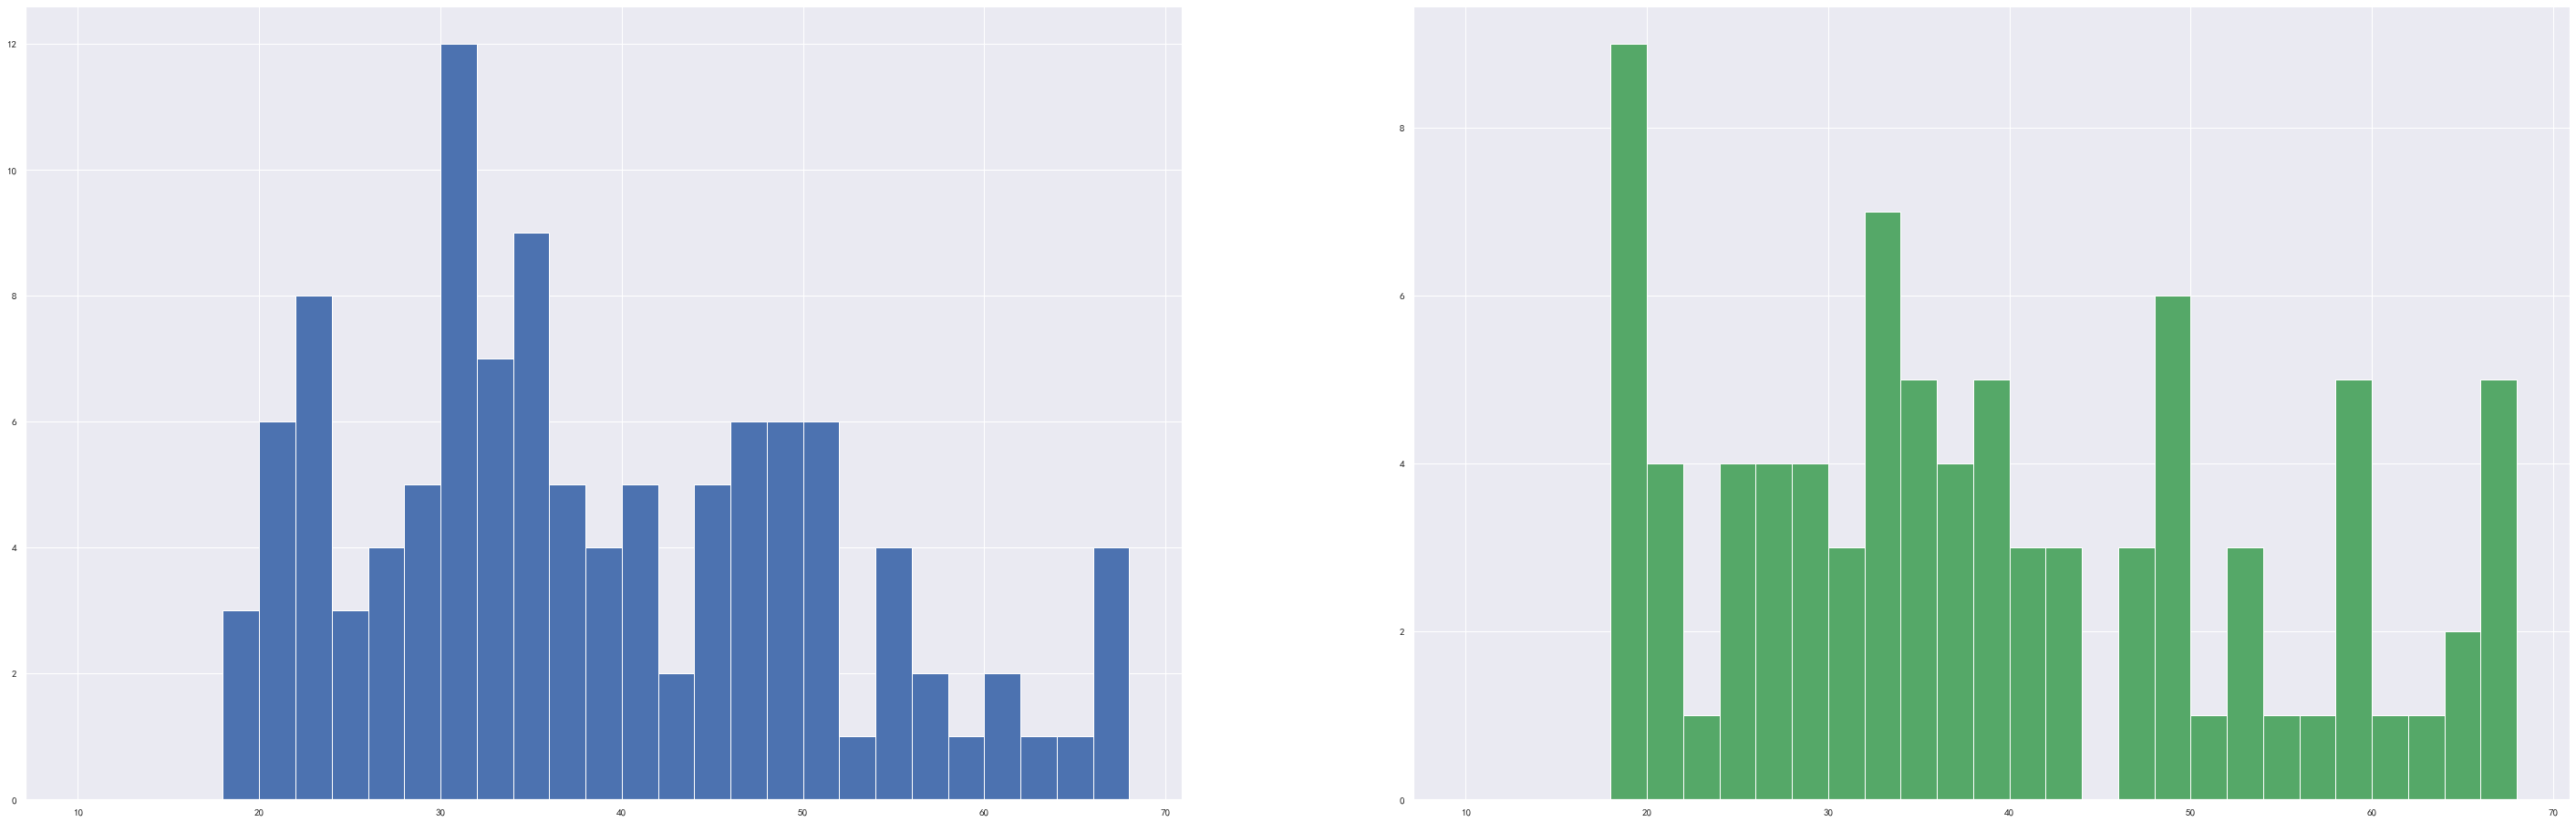

In [109]:
# d = data.groupby(['Gender', 'Age']).size()
# d['Female'].values
plt.figure(4, (50, 16))
# d[d==0]
plt.subplot(1, 2, 1)
d = data[data['Gender'] == 'Female']
plt.hist(d['Age'], [x*2 for x in range(5,35)])
plt.subplot(1, 2, 2)
d = data[data['Gender'] == 'Male']
plt.hist(d['Age'], [x*2 for x in range(5,35)], color='g')
plt.show()

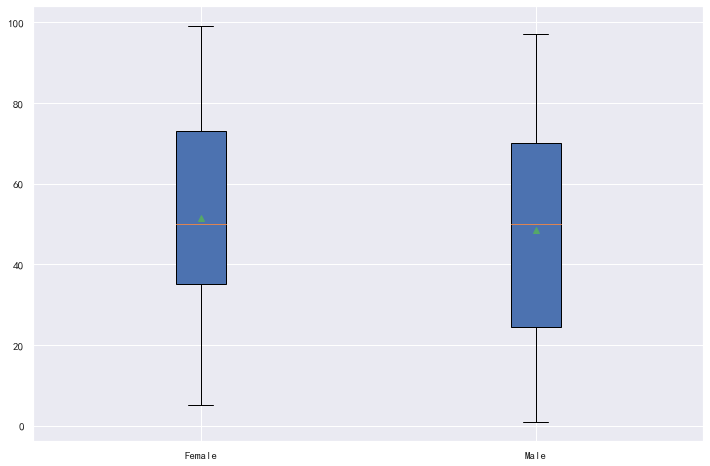

In [117]:
plt.figure(5, (12, 8))

d = data[data['Gender'] == 'Female']
d2 = data[data['Gender'] == 'Male']

plt.boxplot([d['Spending Score (1-100)'], d2['Spending Score (1-100)']], 
              sym = 'o',
              vert = True,
              whis = 1.5,
              patch_artist = True,
              meanline = False,
              showmeans = True,
              showbox = True,
              showcaps = True,
              showfliers = True,
              notch = False,)

plt.xticks([1,2], ['Female', 'Male'])

plt.show()

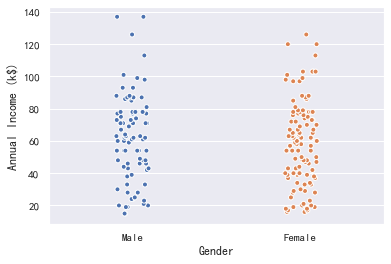

In [121]:

d = data.loc[:,['Gender', 'Annual Income (k$)']]
sns.stripplot(x = 'Gender',       #x ---> 设置分组统计字段
              y = 'Annual Income (k$)',#y ---> 数据分布统计字段
              #这里xy数据对调，会使得散点图横向分布
              data = d,    #data ---> 对应数据
              jitter = True, #jitter ---> 当数据重合较多时，用该参数做一些调整，也可以设置间距如，jitter = 0.1    
              size = 5, edgecolor = 'w', linewidth = 1, marker = 'o'
              )